In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn

import math

from scipy.stats import entropy

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("curriculum-access.txt", sep=" ", names=["date", "time", "destination", "user", "cohort", "ip"])
df

,date,time,destination,user,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...,...,...
543591,2020-05-15,15:01:40,java-ii/file-io,602,56.0,48.188.241.68
543592,2020-05-15,15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
543593,2020-05-15,15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17
543594,2020-05-15,15:05:14,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [3]:
df["timestamp"] = df.date + " " + df.time
df.drop(columns=["date", "time"], inplace=True)
df

,destination,user,cohort,ip,timestamp
0,/,1,8.0,98.106.20.62,2018-01-26 09:55:03
1,java-ii,1,8.0,98.106.20.62,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,98.106.20.62,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,98.106.20.62,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,98.106.20.62,2018-01-26 09:56:24
...,...,...,...,...,...
543591,java-ii/file-io,602,56.0,48.188.241.68,2020-05-15 15:01:40
543592,9-timeseries/3-prep,582,55.0,48.135.163.38,2020-05-15 15:01:54
543593,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17,2020-05-15 15:03:37
543594,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227,2020-05-15 15:05:14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543596 entries, 0 to 543595
Data columns (total 5 columns):
destination    543595 non-null object
user           543596 non-null int64
cohort         515740 non-null float64
ip             543596 non-null object
timestamp      543596 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 20.7+ MB


In [5]:
df.timestamp = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543596 entries, 0 to 543595
Data columns (total 5 columns):
destination    543595 non-null object
user           543596 non-null int64
cohort         515740 non-null float64
ip             543596 non-null object
timestamp      543596 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 20.7+ MB


In [6]:
df = df.set_index("timestamp")
df

,destination,user,cohort,ip
timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543596 entries, 2018-01-26 09:55:03 to 2020-05-15 15:06:05
Data columns (total 4 columns):
destination    543595 non-null object
user           543596 non-null int64
cohort         515740 non-null float64
ip             543596 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 20.7+ MB


In [8]:
df.destination.value_counts()

/                                          28920
javascript-i                               10950
search/search_index.json                   10859
toc                                         9839
html-css                                    8202
                                           ...  
2.0_Intro_Stats                                1
javascript-i/bom-and-dom/bom/google.com        1
6.3_Aquire                                     1
quic/115                                       1
%20https://github.com/RaulCPena                1
Name: destination, Length: 1811, dtype: int64

In [9]:
df[df.cohort == 55]

,destination,user,cohort,ip
timestamp,,,,
2020-02-03 15:39:34,login,575,55.0,98.106.20.59
2020-02-03 15:39:35,/,576,55.0,98.106.20.59
2020-02-03 15:39:37,/,577,55.0,98.106.20.59
2020-02-03 15:39:37,login,575,55.0,98.106.20.59
2020-02-03 15:39:43,/,578,55.0,98.106.20.59
...,...,...,...,...
2020-05-15 14:46:46,search/search_index.json,591,55.0,174.176.101.202
2020-05-15 14:47:01,appendix/professional-development/t-block-less...,591,55.0,174.176.101.202
2020-05-15 14:49:50,appendix/professional-development/vertical-resume,591,55.0,174.176.101.202


In [10]:
df["cohort_name"] = np.where(df["cohort"] == 55, "Curie", "Other")
df

,destination,user,cohort,ip,cohort_name
timestamp,,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62,Other
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62,Other
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62,Other
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62,Other
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62,Other
...,...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68,Other
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38,Curie
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17,Other


In [11]:
df[df.cohort == 55]

,destination,user,cohort,ip,cohort_name
timestamp,,,,,
2020-02-03 15:39:34,login,575,55.0,98.106.20.59,Curie
2020-02-03 15:39:35,/,576,55.0,98.106.20.59,Curie
2020-02-03 15:39:37,/,577,55.0,98.106.20.59,Curie
2020-02-03 15:39:37,login,575,55.0,98.106.20.59,Curie
2020-02-03 15:39:43,/,578,55.0,98.106.20.59,Curie
...,...,...,...,...,...
2020-05-15 14:46:46,search/search_index.json,591,55.0,174.176.101.202,Curie
2020-05-15 14:47:01,appendix/professional-development/t-block-less...,591,55.0,174.176.101.202,Curie
2020-05-15 14:49:50,appendix/professional-development/vertical-resume,591,55.0,174.176.101.202,Curie


In [12]:
df.cohort.value_counts()

33.0    38851
28.0    37409
29.0    36613
24.0    35336
53.0    29992
22.0    28997
23.0    28193
32.0    27920
26.0    27586
51.0    26389
52.0    26212
25.0    25364
31.0    24322
34.0    23845
27.0    20264
56.0    14438
55.0    14252
57.0     9547
14.0     9374
1.0      8882
21.0     7411
17.0     4821
13.0     2626
8.0      1712
18.0     1641
19.0     1165
16.0      743
15.0      691
7.0       495
12.0      270
11.0      204
2.0        93
6.0        72
9.0         5
4.0         4
5.0         1
Name: cohort, dtype: int64

In [13]:
df["2020-05-15 14:18:00":]

,destination,user,cohort,ip,cohort_name
timestamp,,,,,
2020-05-15 14:18:00,9-timeseries/project,576,55.0,100.127.114.141,Curie
2020-05-15 14:18:01,9-timeseries/project,590,55.0,131.46.48.57,Curie
2020-05-15 14:18:53,9-timeseries/project,588,55.0,71.95.165.84,Curie
2020-05-15 14:19:26,9-timeseries/5.2-modeling-lesson2,588,55.0,71.95.165.84,Curie
2020-05-15 14:24:33,java-ii/file-io,648,56.0,77.188.54.88,Other
...,...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68,Other
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38,Curie
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17,Other


In [14]:
curie = df[df.cohort_name == "Curie"]
curie

,destination,user,cohort,ip,cohort_name
timestamp,,,,,
2020-02-03 15:39:34,login,575,55.0,98.106.20.59,Curie
2020-02-03 15:39:35,/,576,55.0,98.106.20.59,Curie
2020-02-03 15:39:37,/,577,55.0,98.106.20.59,Curie
2020-02-03 15:39:37,login,575,55.0,98.106.20.59,Curie
2020-02-03 15:39:43,/,578,55.0,98.106.20.59,Curie
...,...,...,...,...,...
2020-05-15 14:46:46,search/search_index.json,591,55.0,174.176.101.202,Curie
2020-05-15 14:47:01,appendix/professional-development/t-block-less...,591,55.0,174.176.101.202,Curie
2020-05-15 14:49:50,appendix/professional-development/vertical-resume,591,55.0,174.176.101.202,Curie


In [15]:
curie_ip_cts = pd.DataFrame(curie["ip"].resample("30T").count())
curie_ip_cts.head(50)

,ip
timestamp,
2020-02-03 15:30:00,43
2020-02-03 16:00:00,0
2020-02-03 16:30:00,3
2020-02-03 17:00:00,0
2020-02-03 17:30:00,0
2020-02-03 18:00:00,0
2020-02-03 18:30:00,0
2020-02-03 19:00:00,0
2020-02-03 19:30:00,19


In [16]:
idx = pd.date_range(
    curie_ip_cts.sort_index().index.min(),
    curie_ip_cts.sort_index().index.max(),
    freq = "30min"
)

curie_ip_cts = curie_ip_cts.reindex(index=idx, fill_value=0).fillna(value=0)
curie_ip_cts.head(50)

,ip
2020-02-03 15:30:00,43
2020-02-03 16:00:00,0
2020-02-03 16:30:00,3
2020-02-03 17:00:00,0
2020-02-03 17:30:00,0
2020-02-03 18:00:00,0
2020-02-03 18:30:00,0
2020-02-03 19:00:00,0
2020-02-03 19:30:00,19
2020-02-03 20:00:00,15


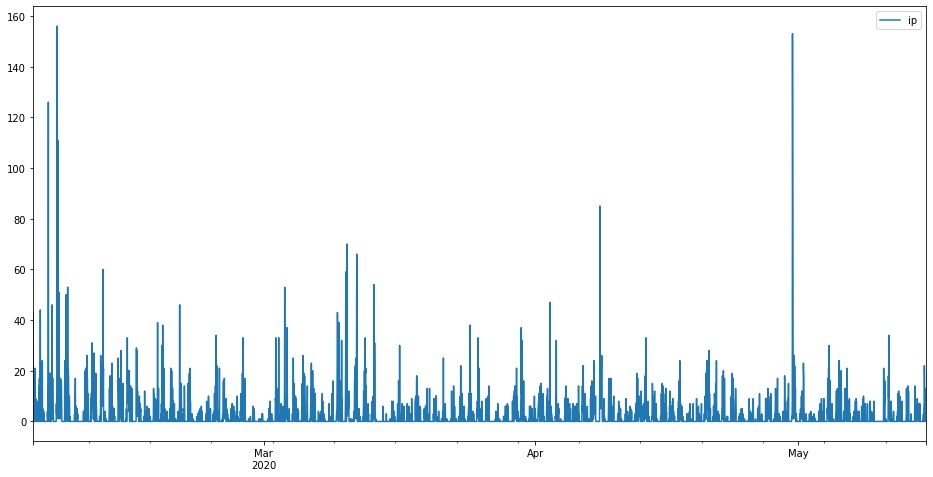

In [17]:
curie_ip_cts.plot(figsize=(16, 8))
plt.show()

In [18]:
april_may = curie_ip_cts["2020-04":]
april_may

,ip
2020-04-01 00:00:00,5
2020-04-01 00:30:00,0
2020-04-01 01:00:00,0
2020-04-01 01:30:00,0
2020-04-01 02:00:00,0
...,...
2020-05-15 13:00:00,0
2020-05-15 13:30:00,10
2020-05-15 14:00:00,13
2020-05-15 14:30:00,3


# Simple Moving Average

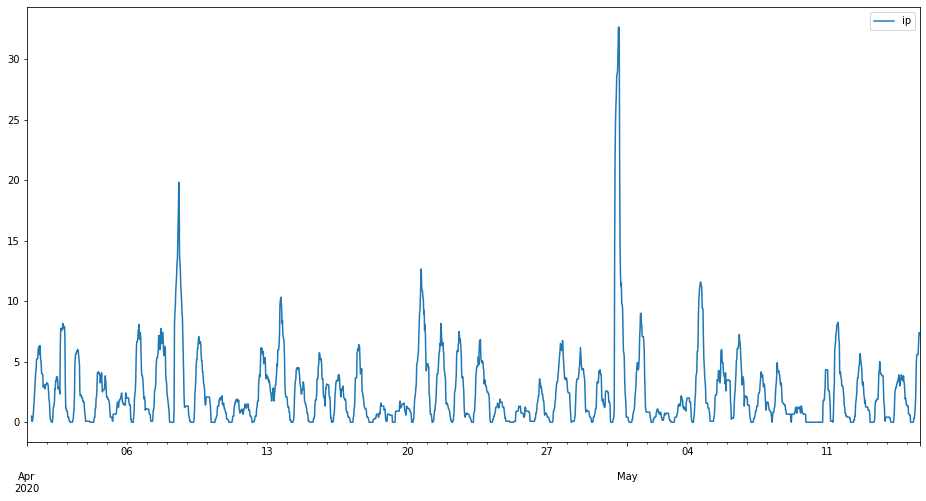

In [19]:
six_hour_mean = april_may.rolling(12).mean()
six_hour_mean.plot(figsize=(16, 8))
plt.show()

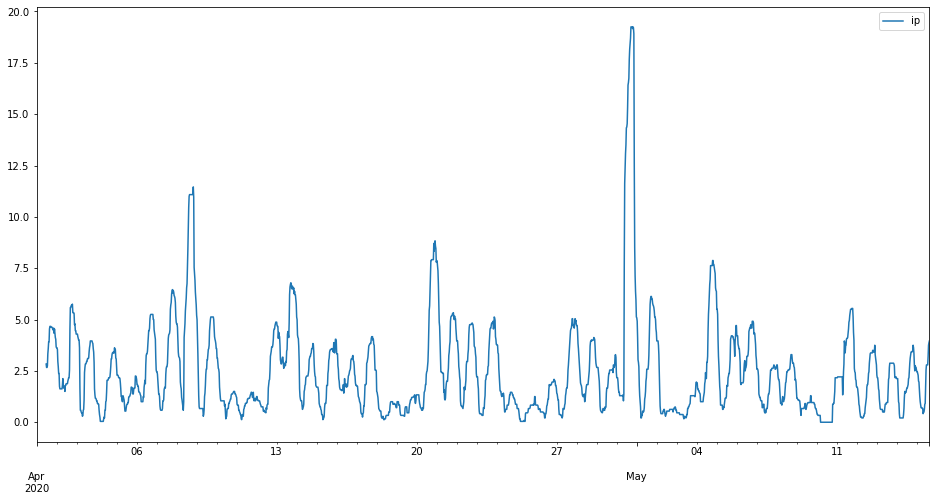

In [20]:
twelve_hour_mean = april_may.rolling(24).mean()
twelve_hour_mean.plot(figsize=(16, 8))

plt.show()

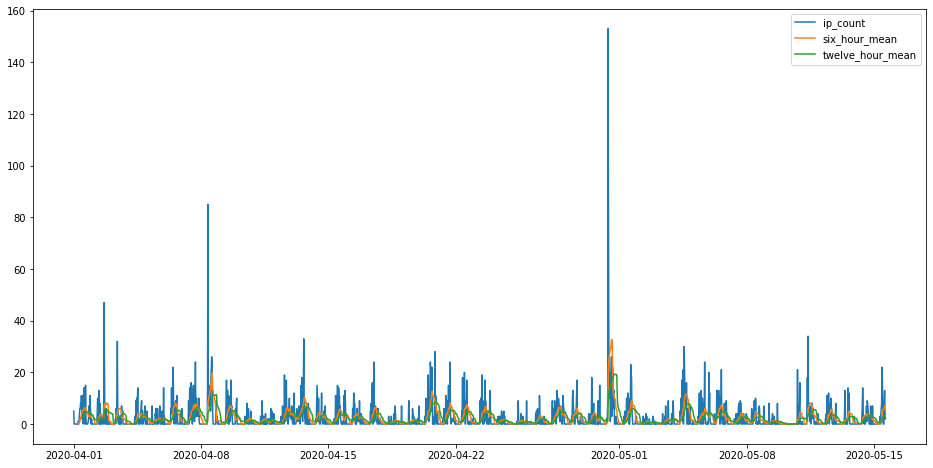

In [21]:
plt.figure(figsize=(16, 8))
# mdates.DateFormatter("%m-%d %H:%T")

plt.plot(april_may, label="ip_count")
plt.plot(six_hour_mean, label="six_hour_mean")
plt.plot(twelve_hour_mean, label="twelve_hour_mean")

plt.legend()
plt.show()

# Exponential Moving Average

In [22]:
april_may.tail()

,ip
2020-05-15 13:00:00,0
2020-05-15 13:30:00,10
2020-05-15 14:00:00,13
2020-05-15 14:30:00,3
2020-05-15 15:00:00,2


In [23]:
ema_short = april_may.ewm(span=12, adjust=False).mean()
ema_short.tail()

,ip
2020-05-15 13:00:00,4.396650
2020-05-15 13:30:00,5.258704
2020-05-15 14:00:00,6.449673
2020-05-15 14:30:00,5.918954
2020-05-15 15:00:00,5.316038


In [24]:
ema_long = april_may.ewm(span=24, adjust=False).mean()
ema_long.tail()

,ip
2020-05-15 13:00:00,3.678902
2020-05-15 13:30:00,4.184590
2020-05-15 14:00:00,4.889823
2020-05-15 14:30:00,4.738637
2020-05-15 15:00:00,4.519546


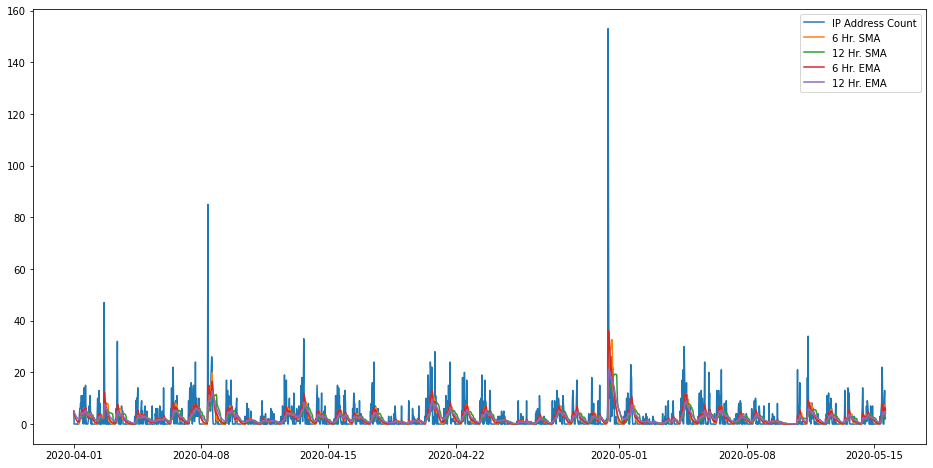

In [25]:
plt.figure(figsize=(16, 8))
# mdates.DateFormatter("%m-%d %H:%T")

plt.plot(april_may, label="IP Address Count")
plt.plot(six_hour_mean, label="6 Hr. SMA")
plt.plot(twelve_hour_mean, label="12 Hr. SMA")
plt.plot(ema_short, label="6 Hr. EMA")
plt.plot(ema_long, label="12 Hr. EMA")

plt.legend()
plt.show()

# Bollinger Bands %B

In [26]:
curie = curie_ip_cts

In [27]:
curie

,ip
2020-02-03 15:30:00,43
2020-02-03 16:00:00,0
2020-02-03 16:30:00,3
2020-02-03 17:00:00,0
2020-02-03 17:30:00,0
...,...
2020-05-15 13:00:00,0
2020-05-15 13:30:00,10
2020-05-15 14:00:00,13
2020-05-15 14:30:00,3


In [28]:
ema = curie.ewm(span=48, adjust=False).mean()
std = curie.ewm(span=48, adjust=False).std()
mb = ema["2020-05-15 15:00:00":]
ub = mb + std*3
lb = mb - std*3

In [29]:
ema["2020-05-15 15:00:00":]

,ip
2020-05-15 15:00:00,3.490091


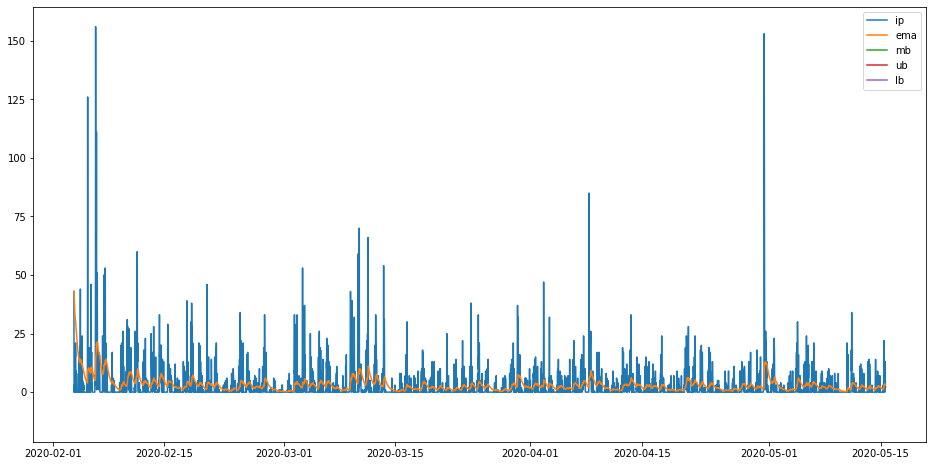

In [30]:
plt.figure(figsize=(16, 8))

plt.plot(curie, label="ip")
plt.plot(ema, label="ema")
plt.plot(mb, label="mb")
plt.plot(ub, label="ub")
plt.plot(lb, label="lb")

plt.legend()
plt.show()